In [1]:
from __future__ import division  # Python 2 users only
# import notebook
import nltk, re, pprint
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.collocations import BigramCollocationFinder
from collections import Counter
#from string import lower
from __future__ import division
from itertools import *
import codecs
import urllib2
import sys
import os
import string
%matplotlib inline
#matplotlib.use('Agg')
import matplotlib.pyplot as plot
import matplotlib.colors as colors
plot.rcParams['figure.figsize'] = (21, 14)
# import spacy
from __future__ import unicode_literals
import pandas as pd
import itertools as it
import numpy as np
from scipy.stats import rankdata
# import textacy

### Erik's stuff here

## Building the Feature Sets

In [2]:
## stephen holiday feature set
def nameFeatures(name):
    name=name.lower()
    return {
        'last_letter': name[-1],
        'last_two' : name[-2:],
        'last_is_vowel' : (name[-1] in 'aeiouy')
        }

In [3]:
nameFeatures('Shrek')

{u'last_is_vowel': False, u'last_letter': u'k', u'last_two': u'ek'}

In [141]:
## fixed suffix 2 so it grabs last two characters, sted of only second to last; scores slightly higher
def gender_features(word):
    return {'suffix1': word[-1],
            'suffix2': word[-2:],
            'last_is_vowel' : (word[-1] in 'aeiouy')}

## Creating the Training, Dev_Test, and Test Sets

In [142]:
import random
from nltk.corpus import names
random.seed(1234) # for reproducibility
names = ([(name, 'male') for name in names.words('male.txt')] +
         [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names) 

test_names = names[:500]
devtest_names = names[500:1000]
train_names = names[1000:]

In [135]:
print len(test_names), len(devtest_names), len(train_names)

500 500 6944


In [16]:
names[0:9]

[(u'Garwin', u'male'),
 (u'Cindie', u'female'),
 (u'Juanita', u'male'),
 (u'Dael', u'female'),
 (u'Jillayne', u'female'),
 (u'Sean', u'male'),
 (u'Nell', u'female'),
 (u'Christie', u'male'),
 (u'Shannen', u'female')]

## Building a Classifier based on Naive Bayes
Using the gender features set

In [143]:
train_set = [(gender_features(n), g) for (n,g) in train_names]
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]
test_set = [(gender_features(n), g) for (n,g) in test_names]
nbclassifier = nltk.NaiveBayesClassifier.train(train_set) 
print nltk.classify.accuracy(nbclassifier, devtest_set)

0.766


In [145]:
errors = []
for (name, tag) in devtest_names:
    guess = nbclassifier.classify(gender_features(name))
    if guess != tag:
        errors.append((tag, guess, name))

for (tag, guess, name) in sorted(errors):
    print 'correct=%-8s guess=%-8s name=%-30s' %(tag, guess, name)

correct=female   guess=male     name=Aimil                         
correct=female   guess=male     name=Alys                          
correct=female   guess=male     name=Amargo                        
correct=female   guess=male     name=Ambur                         
correct=female   guess=male     name=Annabell                      
correct=female   guess=male     name=Arabel                        
correct=female   guess=male     name=Beitris                       
correct=female   guess=male     name=Beulah                        
correct=female   guess=male     name=Blair                         
correct=female   guess=male     name=Brigid                        
correct=female   guess=male     name=Brit                          
correct=female   guess=male     name=Carmon                        
correct=female   guess=male     name=Delores                       
correct=female   guess=male     name=Deloris                       
correct=female   guess=male     name=Denys      

In [146]:
nbclassifier.show_most_informative_features(10)

Most Informative Features
                 suffix2 = u'na'          female : male   =    158.9 : 1.0
                 suffix1 = u'a'           female : male   =     42.4 : 1.0
                 suffix2 = u'ia'          female : male   =     36.7 : 1.0
                 suffix2 = u'ra'          female : male   =     35.2 : 1.0
                 suffix2 = u'ld'            male : female =     32.7 : 1.0
                 suffix2 = u'sa'          female : male   =     31.9 : 1.0
                 suffix1 = u'k'             male : female =     29.8 : 1.0
                 suffix2 = u'ta'          female : male   =     28.8 : 1.0
                 suffix2 = u'us'            male : female =     26.9 : 1.0
                 suffix2 = u'do'            male : female =     26.1 : 1.0


## Building Classifier Based on Decision Trees
Using Gender Features

In [147]:
classifier = nltk.classify.DecisionTreeClassifier.train(train_set, entropy_cutoff=0,support_cutoff=0)
print nltk.classify.accuracy(classifier, devtest_set)

0.774


In [148]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append((tag, guess, name))

for (tag, guess, name) in sorted(errors):
    print 'correct=%-8s guess=%-8s name=%-30s' %(tag, guess, name)

correct=female   guess=male     name=Aimil                         
correct=female   guess=male     name=Amargo                        
correct=female   guess=male     name=Ambur                         
correct=female   guess=male     name=Annabell                      
correct=female   guess=male     name=Blair                         
correct=female   guess=male     name=Brigid                        
correct=female   guess=male     name=Brit                          
correct=female   guess=male     name=Brooke                        
correct=female   guess=male     name=Carmon                        
correct=female   guess=male     name=Delores                       
correct=female   guess=male     name=Dorit                         
correct=female   guess=male     name=Eleanor                       
correct=female   guess=male     name=Ethelind                      
correct=female   guess=male     name=Evangelin                     
correct=female   guess=male     name=Genvieve   

In [72]:
def gender_features4(name):
    features = {}
    features["firstletter"] = name[0].lower()
    features["lastletter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features

In [60]:
train_set = [(gender_features4(n), g) for (n,g) in train_names]
devtest_set = [(gender_features4(n), g) for (n,g) in devtest_names]
test_set = [(gender_features4(n), g) for (n,g) in test_names]
nbclassifier = nltk.NaiveBayesClassifier.train(train_set) 
print nltk.classify.accuracy(nbclassifier, devtest_set)

0.75


## Tom's analysis using Social Security names and a gender index

There are three versions based on different feature sets. Nomenclature follows *featuresetX(num)*, and *namesList2* is the list of 1950-2015 names from the Social Security data. You have to run the code in the appendix section to generate nam To run this, you'll have to generate *namesList2*. The featuresets are:  

* 1 -- gender index and last letter in name
* 2 -- g_index, last letter, last two letters and last is vowel (bool)
* 3 -- same as 2, except remove the gender index


### The featureset functions

In [149]:
## feature set 1 
def gender_featuresX(namelist):
    return {'g_index': namelist[1],
            'last_letter': namelist[0][-1]}


In [150]:
## feature set 2
def  gender_featuresX2(nameList):
    return {
        'last_letter': nameList[0][-1],
        'last_two' : nameList[0][-2:],
        'last_is_vowel' : (nameList[0][-1] in 'aeiouy'),
        'g_index': nameList[1]
        }

In [151]:
## feature set 3
def  gender_featuresX3(nameList):
    return {
        'last_letter': nameList[0][-1],
        'last_two' : nameList[0][-2:],
        'last_is_vowel' : (nameList[0][-1] in 'aeiouy')
        }

### Featureset 1


In [155]:
## code randomly shuffles the Social Security names list, then makes a featuresetX
random.shuffle(namesList2) 
featuresetX = []
for i in range(len(namesList2)):
    features = gender_featuresX(namesList2[i])
    gender = namesList2[i][2]
    row = (features, gender)
    featuresetX.append(row)

In [156]:
## select training, development and test sets
train_setX = featuresetX[1000:]
test_setX = featuresetX[:500]
dev_setX = featuresetX[500:1000]

In [157]:
## check for conformity
train_setX[0:5]

[({u'g_index': 1.0, u'last_letter': 'h'}, u'male'),
 ({u'g_index': 1.0, u'last_letter': 's'}, u'male'),
 ({u'g_index': -1.0, u'last_letter': 'a'}, u'female'),
 ({u'g_index': -1.0, u'last_letter': 'a'}, u'female'),
 ({u'g_index': -1.0, u'last_letter': 'a'}, u'female')]

In [168]:
## train the classifier, check accuracy
nbclassifierX = nltk.NaiveBayesClassifier.train(train_setX) 
print nltk.classify.accuracy(classifierX, dev_setX)

0.98


In [169]:
## most informative features
nbclassifierX.show_most_informative_features(5)

Most Informative Features
             last_letter = 'k'              male : female =     29.7 : 1.0
             last_letter = 'a'            female : male   =     17.0 : 1.0
             last_letter = 'v'              male : female =     16.6 : 1.0
             last_letter = 'p'              male : female =     16.2 : 1.0
             last_letter = 'f'              male : female =     15.6 : 1.0


In [170]:
## look at the errors
errors = []
for (name, tag) in dev_setX:
    guess = nbclassifierX.classify(gender_featuresX(namesList2))
    if guess != tag:
        errors.append( (tag, guess, name) )
        
for (tag, guess, name) in sorted(errors): # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print 'correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name)        

correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}

### Featureset 2: Add suffix2, last word is vowel

In [161]:
random.shuffle(namesList2) 
featuresetX2 = []
for i in range(len(namesList2)):
    features = gender_featuresX2(namesList2[i])
    gender = namesList2[i][2]
    row = (features, gender)
    featuresetX2.append(row)

In [162]:
train_setX2 = featuresetX2[1000:]
test_setX2 = featuresetX2[:1000]
dev_setX2 = featuresetX2[1000:2000]

In [163]:
len(train_setX2), len(test_setX2), len(dev_setX2)

(87860, 1000, 1000)

In [164]:
nbclassifierX2 = nltk.NaiveBayesClassifier.train(train_setX2) 
print nltk.classify.accuracy(nbclassifierX2, dev_setX2)

0.972


In [165]:
nbclassifierX2.show_most_informative_features(5)

Most Informative Features
                last_two = 'do'             male : female =    145.8 : 1.0
                last_two = 'ck'             male : female =     92.8 : 1.0
                last_two = 'rd'             male : female =     67.8 : 1.0
                last_two = 'ph'             male : female =     67.5 : 1.0
                last_two = 'no'             male : female =     56.4 : 1.0


In [167]:
## look at the errors
errors = []
for (name, tag) in dev_setX:
    guess = nbclassifierX2.classify(gender_featuresX2(namesList2))
    if guess != tag:
        errors.append( (tag, guess, name) )
        
for (tag, guess, name) in sorted(errors): # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print 'correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name)        

correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}

### Featureset 3: Remove gender index from featureset 2

In [171]:
## code is different to prepare featureset for our gender-indexed data from Social Security (namesList2); requires different approach
random.shuffle(namesList2) 
featuresetX3 = []
for i in range(len(namesList2)):
    features = gender_featuresX3(namesList2[i])
    gender = namesList2[i][2]
    row = (features, gender)
    featuresetX3.append(row)

In [172]:
## featureset is copied over here and train, dev and test sets selected on our SS names
train_setX3 = featuresetX3[1000:]
test_setX3 = featuresetX3[:1000]
dev_setX3 = featuresetX3[1000:2000]

In [173]:
nbclassifierX3 = nltk.NaiveBayesClassifier.train(train_setX3) 
print nltk.classify.accuracy(nbclassifierX3, dev_setX3)

0.797


In [175]:
nbclassifierX3.show_most_informative_features(5)

Most Informative Features
                last_two = 'do'             male : female =    147.9 : 1.0
                last_two = 'ck'             male : female =     93.9 : 1.0
                last_two = 'rd'             male : female =     68.3 : 1.0
                last_two = 'ph'             male : female =     67.5 : 1.0
                last_two = 'no'             male : female =     56.4 : 1.0


In [177]:
## look at the errors
errors = []
for (name, tag) in dev_setX:
    guess = nbclassifierX3.classify(gender_featuresX3(namesList2))
    if guess != tag:
        errors.append( (tag, guess, name) )
        
for (tag, guess, name) in sorted(errors): # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print 'correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name) 

correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}
correct=female   guess=male     name={u'g_index': -1.0, u'last_letter': 'a'}

### A couple checks; nails male names the others miss, but gets 'Trinity' wrong

In [179]:
nbclassifierX.classify(gender_featuresX('Joe')), nbclassifierX2.classify(gender_featuresX2('Joe')), nbclassifierX3.classify(gender_featuresX3('Joe'))

(u'male', u'male', u'male')

In [180]:
nbclassifierX.classify(gender_featuresX('Howie')), nbclassifierX2.classify(gender_featuresX2('Howie')), nbclassifierX3.classify(gender_featuresX3('Howie'))


(u'male', u'male', u'male')

In [181]:
nbclassifierX.classify(gender_featuresX('Neo')), nbclassifierX2.classify(gender_featuresX2('Neo')), nbclassifierX3.classify(gender_featuresX3('Neo'))

(u'male', u'male', u'male')

In [182]:
nbclassifierX.classify(gender_featuresX('Trinity')), nbclassifierX2.classify(gender_featuresX2('Trinity')), nbclassifierX3.classify(gender_featuresX3('Trinity'))

(u'male', u'male', u'male')

### Try featureset 1 with decisionTree classification

In [183]:
## code randomly shuffles the Social Security names list, then makes a featuresetX
random.shuffle(namesList2) 
featuresetX = []
for i in range(len(namesList2)):
    features = gender_featuresX(namesList2[i])
    gender = namesList2[i][2]
    row = (features, gender)
    featuresetX.append(row)

In [184]:
## select training, development and test sets
train_setX = featuresetX[1000:]
test_setX = featuresetX[:500]
dev_setX = featuresetX[500:1000]

### Decision tree accuracy is nowhere close

In [187]:
dtclassifier = nltk.classify.DecisionTreeClassifier.train(train_setX, entropy_cutoff=0,support_cutoff=0)
print nltk.classify.accuracy(classifier, dev_setX)

0.646


***
***
***

## Note: Must to run code below to pick up the Social Security data set used above

***
***
***

## Appendix A: Preparation of Social Security Names Data

Data was downloaded from this site on 10/17/2016: https://www.ssa.gov/oact/babynames/limits.html. Zipped .csv files were unpacked into a directory labeled 'names' and processed from there using the steps below.

In [26]:
import glob

In [27]:
## function puts all the social security name files 1950-2015 in a single csv file
def concat(indir='/Users/tjd/Dropbox/CUNY/IS620/names', outfile='/Users/tjd/Dropbox/CUNY/IS620/names/concat.csv'):
    os.chdir(indir)
    fileList = glob.glob("*.txt")
    dfList=[]
    for filename in fileList:
        print(filename)
        df=pd.read_csv(filename, header=None)
        dfList.append(df)
    concatDF=pd.concat(dfList, axis=0)
    concatDF.to_csv(outfile, index=None)

In [28]:
## run the function and report the files that are concatenated
concat()

yob1950.txt
yob1951.txt
yob1952.txt
yob1953.txt
yob1954.txt
yob1955.txt
yob1956.txt
yob1957.txt
yob1958.txt
yob1959.txt
yob1960.txt
yob1961.txt
yob1962.txt
yob1963.txt
yob1964.txt
yob1965.txt
yob1966.txt
yob1967.txt
yob1968.txt
yob1969.txt
yob1970.txt
yob1971.txt
yob1972.txt
yob1973.txt
yob1974.txt
yob1975.txt
yob1976.txt
yob1977.txt
yob1978.txt
yob1979.txt
yob1980.txt
yob1981.txt
yob1982.txt
yob1983.txt
yob1984.txt
yob1985.txt
yob1986.txt
yob1987.txt
yob1988.txt
yob1989.txt
yob1990.txt
yob1991.txt
yob1992.txt
yob1993.txt
yob1994.txt
yob1995.txt
yob1996.txt
yob1997.txt
yob1998.txt
yob1999.txt
yob2000.txt
yob2001.txt
yob2002.txt
yob2003.txt
yob2004.txt
yob2005.txt
yob2006.txt
yob2007.txt
yob2008.txt
yob2009.txt
yob2010.txt
yob2011.txt
yob2012.txt
yob2013.txt
yob2014.txt
yob2015.txt


In [29]:
## switch back to main jupyter working dir
os.chdir('/Users/tjd/Dropbox/CUNY/IS620')

In [30]:
## read SS names into a pandas dataframe and examine
names = pd.read_csv('/Users/tjd/Dropbox/CUNY/IS620/names/concat.csv',names=['name', 'gender', 'count'])

In [31]:
names.head()

,name,gender,count
0,0,1,2
1,Linda,F,80439
2,Mary,F,65485
3,Patricia,F,47952
4,Barbara,F,41570


In [32]:
## drop first row
names.drop(names.index[0])

,name,gender,count
1,Linda,F,80439
2,Mary,F,65485
3,Patricia,F,47952
4,Barbara,F,41570
5,Susan,F,38021
6,Nancy,F,29622
7,Deborah,F,29073
8,Sandra,F,28895
9,Carol,F,26162
10,Kathleen,F,25706


In [33]:
## create male, female subsets
names_grouped = names.groupby(['name', 'gender'], as_index=False)['count'].sum()
males = names_grouped[names_grouped['gender']=='M']
females = names_grouped[names_grouped['gender']=='F']

In [35]:
males.head()

,name,gender,count
1,Aaban,M,87
3,Aabid,M,5
6,Aadam,M,218
7,Aadan,M,122
8,Aadarsh,M,173


In [36]:
females.head()

,name,gender,count
2,Aabha,F,28
4,Aabriella,F,15
5,Aada,F,5
9,Aaden,F,5
15,Aadhira,F,37


In [37]:
## 9259 names can be either f or m
men = set(males.iloc[:,0])
women = set(females.iloc[:,0])
len(men.intersection(women))

In [39]:
## total names for m and f
len(men), len(women)

(36884, 61235)

In [40]:
## merge names so we can create a gender index
m_f = males.merge(females, on='name', how='outer', indicator=True)

In [41]:
## make empty column
m_f['index']=''

In [42]:
## fill with index formula: malecount-femalecount / malecount+femalecount
m_f['index'] = np.where(m_f['_merge']=='left_only', 1, np.where(m_f['_merge']=='right_only', -1, (m_f['count_x'] - m_f['count_y'])/(m_f['count_x'] + m_f['count_y'])))

In [43]:
## inspect
m_f['gender'] = np.where(m_f['index']>0, 'male', 'female')
m_f.head()

,name,gender_x,count_x,gender_y,count_y,_merge,index,gender
0,Aaban,M,87.0,NaN,NaN,left_only,1.0,male
1,Aabid,M,5.0,NaN,NaN,left_only,1.0,male
2,Aadam,M,218.0,NaN,NaN,left_only,1.0,male
3,Aadan,M,122.0,NaN,NaN,left_only,1.0,male
4,Aadarsh,M,173.0,NaN,NaN,left_only,1.0,male


In [46]:
## overall gender count tilts to female
m_f['index'].mean()

-0.27058807072769847

In [47]:
## the index is working; let's see what the distribution of ambiguous names looks like 
m_f[(m_f['index']>-1) & (m_f['index'] < 1)].head()

,name,gender_x,count_x,gender_y,count_y,_merge,index,gender
5,Aaden,M,4213.0,F,5.0,both,0.997629,male
12,Aadi,M,710.0,F,16.0,both,0.955923,male
26,Aadyn,M,416.0,F,16.0,both,0.925926,male
43,Aalijah,M,172.0,F,119.0,both,0.182131,male
45,Aaliyah,M,89.0,F,74710.0,both,-0.997620,female


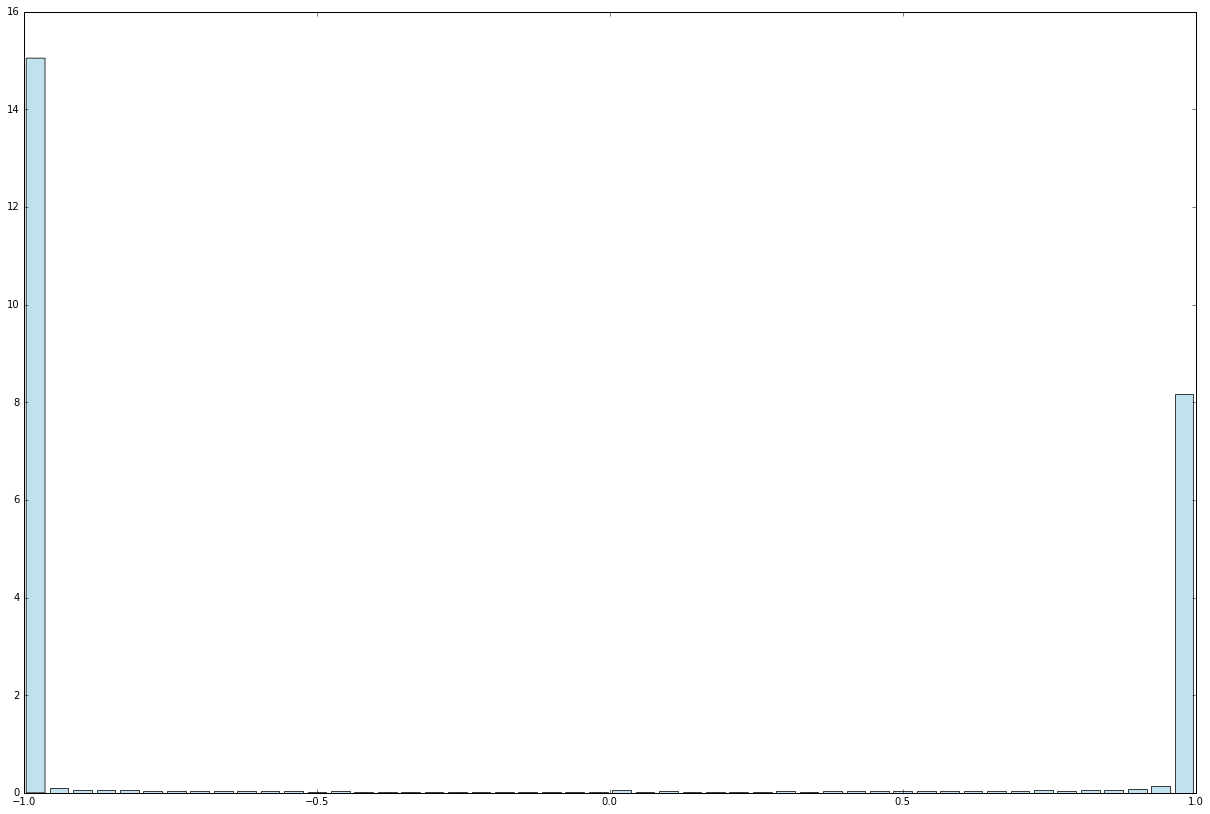

In [48]:
## plot the overall distribution of names by index
n, bins, patches = plot.hist(m_f['index'], 50, normed=1, histtype='bar', rwidth=0.8)
plot.setp(patches, 'facecolor', 'lightblue', 'alpha', 0.75);

In [49]:
## look at the ambiguous names
ambig_index = list(m_f[(m_f['index']>-1) & (m_f['index'] < 1)].iloc[:,6])
ambig_index[:2], ambig_index[-2:]

([0.99762920815552392, 0.9559228650137741],
 [0.59603658536585369, 0.57333333333333336])

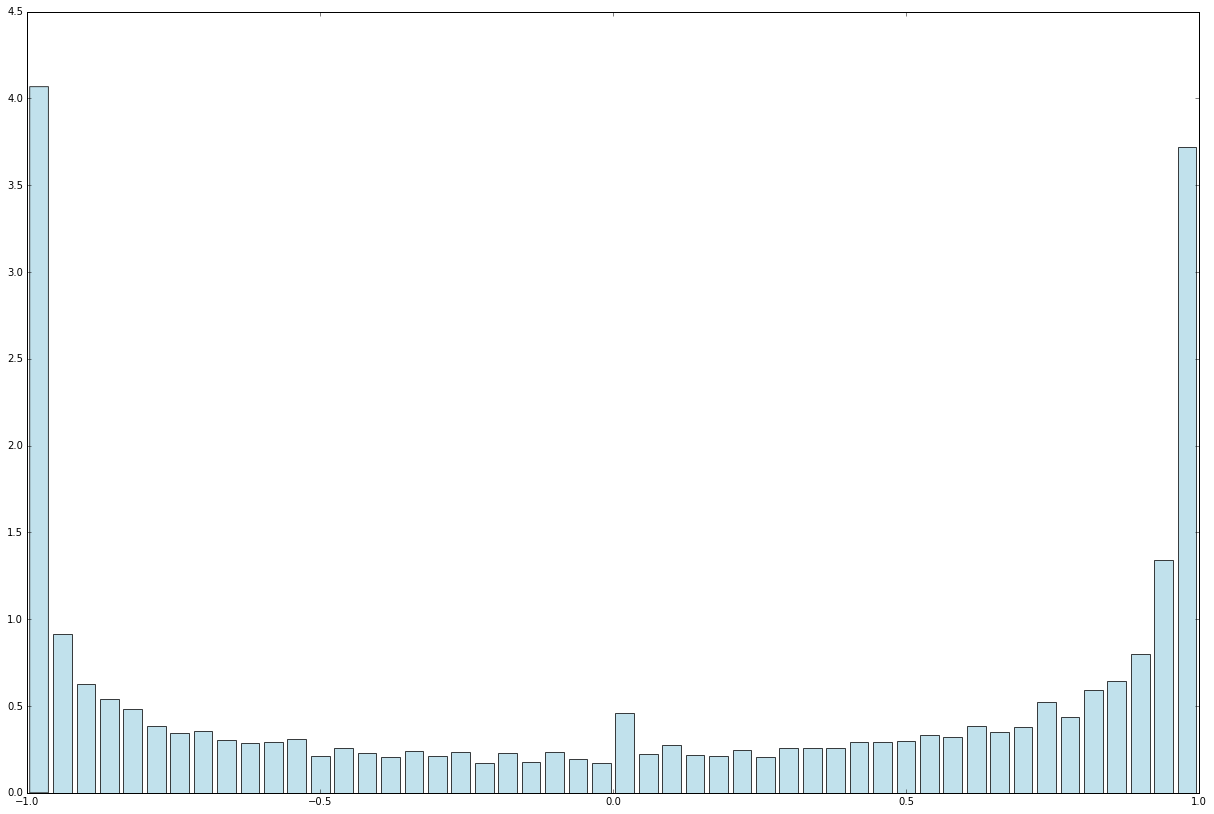

In [50]:
## plot distribution of ambiguous name indices
n, bins, patches = plot.hist(ambig_index, 50, normed=1, histtype='bar', rwidth=0.8)
plot.setp(patches, 'facecolor', 'lightblue', 'alpha', 0.75);

In [51]:
## of the 9K ambiguous names, most (7K) have a >.5 prob of being either M or F 
len([index for index in ambig_index if index < -.5]), len([index for index in ambig_index if index > .5])

(3327, 3678)

In [52]:
## create our own corpus of SS names including the gender and index
namesList = m_f.iloc[:,[0,6,7]]

In [53]:
namesList.head()

,name,index,gender
0,Aaban,1.0,male
1,Aabid,1.0,male
2,Aadam,1.0,male
3,Aadan,1.0,male
4,Aadarsh,1.0,male


In [54]:
## check for duplicates; find none
search = pd.DataFrame.duplicated(namesList)
print search[search == True][:9]

Series([], dtype: bool)


In [70]:
## make our own name list so we can build features in nltk
namesList2 = [tuple(x) for x in namesList.to_records(index=False)]

In [71]:
## check it
namesList2[-5:]

[('Zyriel', -1.0, u'female'),
 ('Zyrielle', -1.0, u'female'),
 ('Zyrihanna', -1.0, u'female'),
 ('Zyriyah', -1.0, u'female'),
 ('Zyyanna', -1.0, u'female')]